In [331]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import API keys: 
#from config.py import api_key

#save data in a CSV
output_file = "output_data/ugb.csv"


transport_data = pd.read_csv("transportation_data_updated.csv", encoding="ISO-8859-1")
transport_data.head(20)

,City,State,id,UGB,Total,Commuting,Percent,Public Transport,percent,Estimate!!Total!!No vehicle available,...,"Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!No vehicle available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!1 vehicle available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!2 vehicles available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!3 or more vehicles available",Estimate!!Total!!Worked at home,Estimate!!Total!!Worked at home!!No vehicle available,Estimate!!Total!!Worked at home!!1 vehicle available,Estimate!!Total!!Worked at home!!2 vehicles available,Estimate!!Total!!Worked at home!!3 or more vehicles available
0,Boulder,Colorado,1600000US0807850,YES,377551,315549,83.58%,62002,16.42%,3727,...,2803,4042,1952,21733,606,4930,9387,6810,NaN,NaN
1,Honolulu,Hawaii,0500000US15003,YES,1401334,1245270,88.86%,156064,11.14%,17048,...,17733,1938,6462,3588,5745,16468,547,4444,6001.0,5476.0
2,Lexington,Kentucky,1600000US2146027,YES,480471,456907,95.10%,23564,4.90%,6011,...,3218,580,640,1427,571,7356,0,2017,3979.0,1360.0
3,Miami,Florida,1600000US1245000,YES,634736,561440,88.45%,73296,11.55%,19405,...,6816,2396,2843,1159,418,13811,2059,5747,4055.0,1950.0
4,Minneapolis,Minnesota,1600000US2743000,YES,686884,567964,82.69%,118920,17.31%,21121,...,14444,2691,4832,3851,3070,14320,1082,4906,6822.0,1510.0
5,Portland,Oregon,1600000US4159000,YES,1000848,820052,81.94%,180796,18.06%,26902,...,27477,4825,8131,9167,5354,30345,1083,11049,12496.0,5717.0
6,San Jose,California,1600000US0668000,YES,1532771,1446627,94.38%,86144,5.62%,10044,...,10623,853,3062,2932,3776,21641,522,3095,9669.0,8355.0
7,Seattle,Washington,1600000US5363000,YES,1206818,893702,74.05%,313116,25.95%,40437,...,17420,2981,7465,4863,2111,30416,1892,10775,12740.0,5009.0
8,St. Paul,Minnesota,1600000US2758000,YES,440120,392182,89.11%,47938,10.89%,8828,...,3820,723,1024,1660,413,7109,103,1681,4373.0,952.0
9,Virginia Beach,Virginia,1600000US5182000,YES,492616,465069,94.41%,27547,5.59%,5092,...,1132,1563,1785,10069,178,1065,5138,3688,NaN,NaN


In [341]:
cities = []
cities = transport_data['City'].unique()

cities

array(['Boulder', 'Honolulu', 'Lexington', 'Miami', 'Minneapolis',
       'Portland', 'San Jose', 'Seattle', 'St. Paul', 'Virginia Beach ',
       'Albuquerque', 'Anaheim', 'Anchorage', 'Arlington', 'Atlanta',
       'Aurora', 'Austin', 'Bakersfield', 'Baltimore', 'Baton Rouge',
       'Boise City ', 'Boston', 'Buffalo', 'Chandler', 'Charlotte',
       'Chesapeake', 'Chicago', 'Chula Vista', 'Cincinnati', 'Cleveland',
       'Colorado Springs', 'Columbus', 'Corpus Christi', 'Dallas',
       'Denver', 'Des Moines', 'Detroit', 'Durham', 'El Paso',
       'Fort Wayne', 'Fort Worth', 'Fremont', 'Fresno', 'Garland',
       'Gilbert', 'Glendale', 'Greensboro', 'Henderson', 'Hialeah',
       'Houston', 'Indianapolis', 'Irvine', 'Irving', 'Jacksonville',
       'Jersey City', 'Kansas City Missouri', 'Laredo', 'Las Vegas',
       'Lincoln', 'Long Beach', 'Los Angeles', 'Louisville ', 'Lubbock',
       'Madison', 'Memphis', 'Mesa', 'Milwaukee', 'Nashville',
       'New Orleans', 'Newark', 'Norfo

In [382]:
summary_table = transport_data.groupby(['UGB'])
print(summary_table)
summary_table.head()

,City,State,id,UGB,Total,Commuting,Percent,Public Transport,percent,Estimate!!Total!!No vehicle available,...,"Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!No vehicle available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!1 vehicle available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!2 vehicles available","Estimate!!Total!!Taxicab, motorcycle, bicycle, or other means!!3 or more vehicles available",Estimate!!Total!!Worked at home,Estimate!!Total!!Worked at home!!No vehicle available,Estimate!!Total!!Worked at home!!1 vehicle available,Estimate!!Total!!Worked at home!!2 vehicles available,Estimate!!Total!!Worked at home!!3 or more vehicles available
0,Boulder,Colorado,1600000US0807850,YES,377551,315549,83.58%,62002,16.42%,3727,...,2803,4042,1952,21733,606,4930,9387,6810,NaN,NaN
1,Honolulu,Hawaii,0500000US15003,YES,1401334,1245270,88.86%,156064,11.14%,17048,...,17733,1938,6462,3588,5745,16468,547,4444,6001.0,5476.0
2,Lexington,Kentucky,1600000US2146027,YES,480471,456907,95.10%,23564,4.90%,6011,...,3218,580,640,1427,571,7356,0,2017,3979.0,1360.0
3,Miami,Florida,1600000US1245000,YES,634736,561440,88.45%,73296,11.55%,19405,...,6816,2396,2843,1159,418,13811,2059,5747,4055.0,1950.0
4,Minneapolis,Minnesota,1600000US2743000,YES,686884,567964,82.69%,118920,17.31%,21121,...,14444,2691,4832,3851,3070,14320,1082,4906,6822.0,1510.0
10,Albuquerque,NewMexico,1600000US3502000,NO,756937,727551,96.12%,29386,3.88%,5348,...,4695,505,1461,1954,775,13006,561,3271,5283.0,3891.0
11,Anaheim,California,1600000US0602000,NO,500376,475690,95.07%,24686,4.93%,2858,...,3215,70,951,777,1417,7230,0,1969,2630.0,2631.0
12,Anchorage,Alaska,1600000US0203000,NO,438873,414849,94.53%,24024,5.47%,4662,...,4915,1061,569,1574,1711,5391,0,1253,1576.0,2562.0
13,Arlington,Texas,1600000US4804000,NO,559890,552000,98.59%,7890,1.41%,2542,...,1537,347,396,519,275,7752,52,1926,3576.0,2198.0
14,Atlanta,Georgia,1600000US1304000,NO,697298,610078,87.49%,87220,12.51%,22323,...,8425,1517,3355,1871,1682,17384,620,6462,7436.0,2866.0


In [384]:
commuting_avg = summary_table["Commuting"].mean()
commuting_avg

UGB
NO     695363.494505
YES    716476.200000
Name: Commuting, dtype: float64

In [385]:
public_transport = summary_table['Public Transport'].mean()
public_transport

UGB
NO      71946.362637
YES    108938.700000
Name: Public Transport, dtype: float64

In [389]:
ugb_vs_non = pd.DataFrame({'Commuting': commuting_avg, 'Public Transport': public_transport})
print(ugb_vs_non)
ugb_vs_non.head()

         Commuting  Public Transport
UGB                                 
NO   695363.494505      71946.362637
YES  716476.200000     108938.700000


,Commuting,Public Transport
UGB,,
NO,695363.494505,71946.362637
YES,716476.200000,108938.700000


<Figure size 432x288 with 0 Axes>

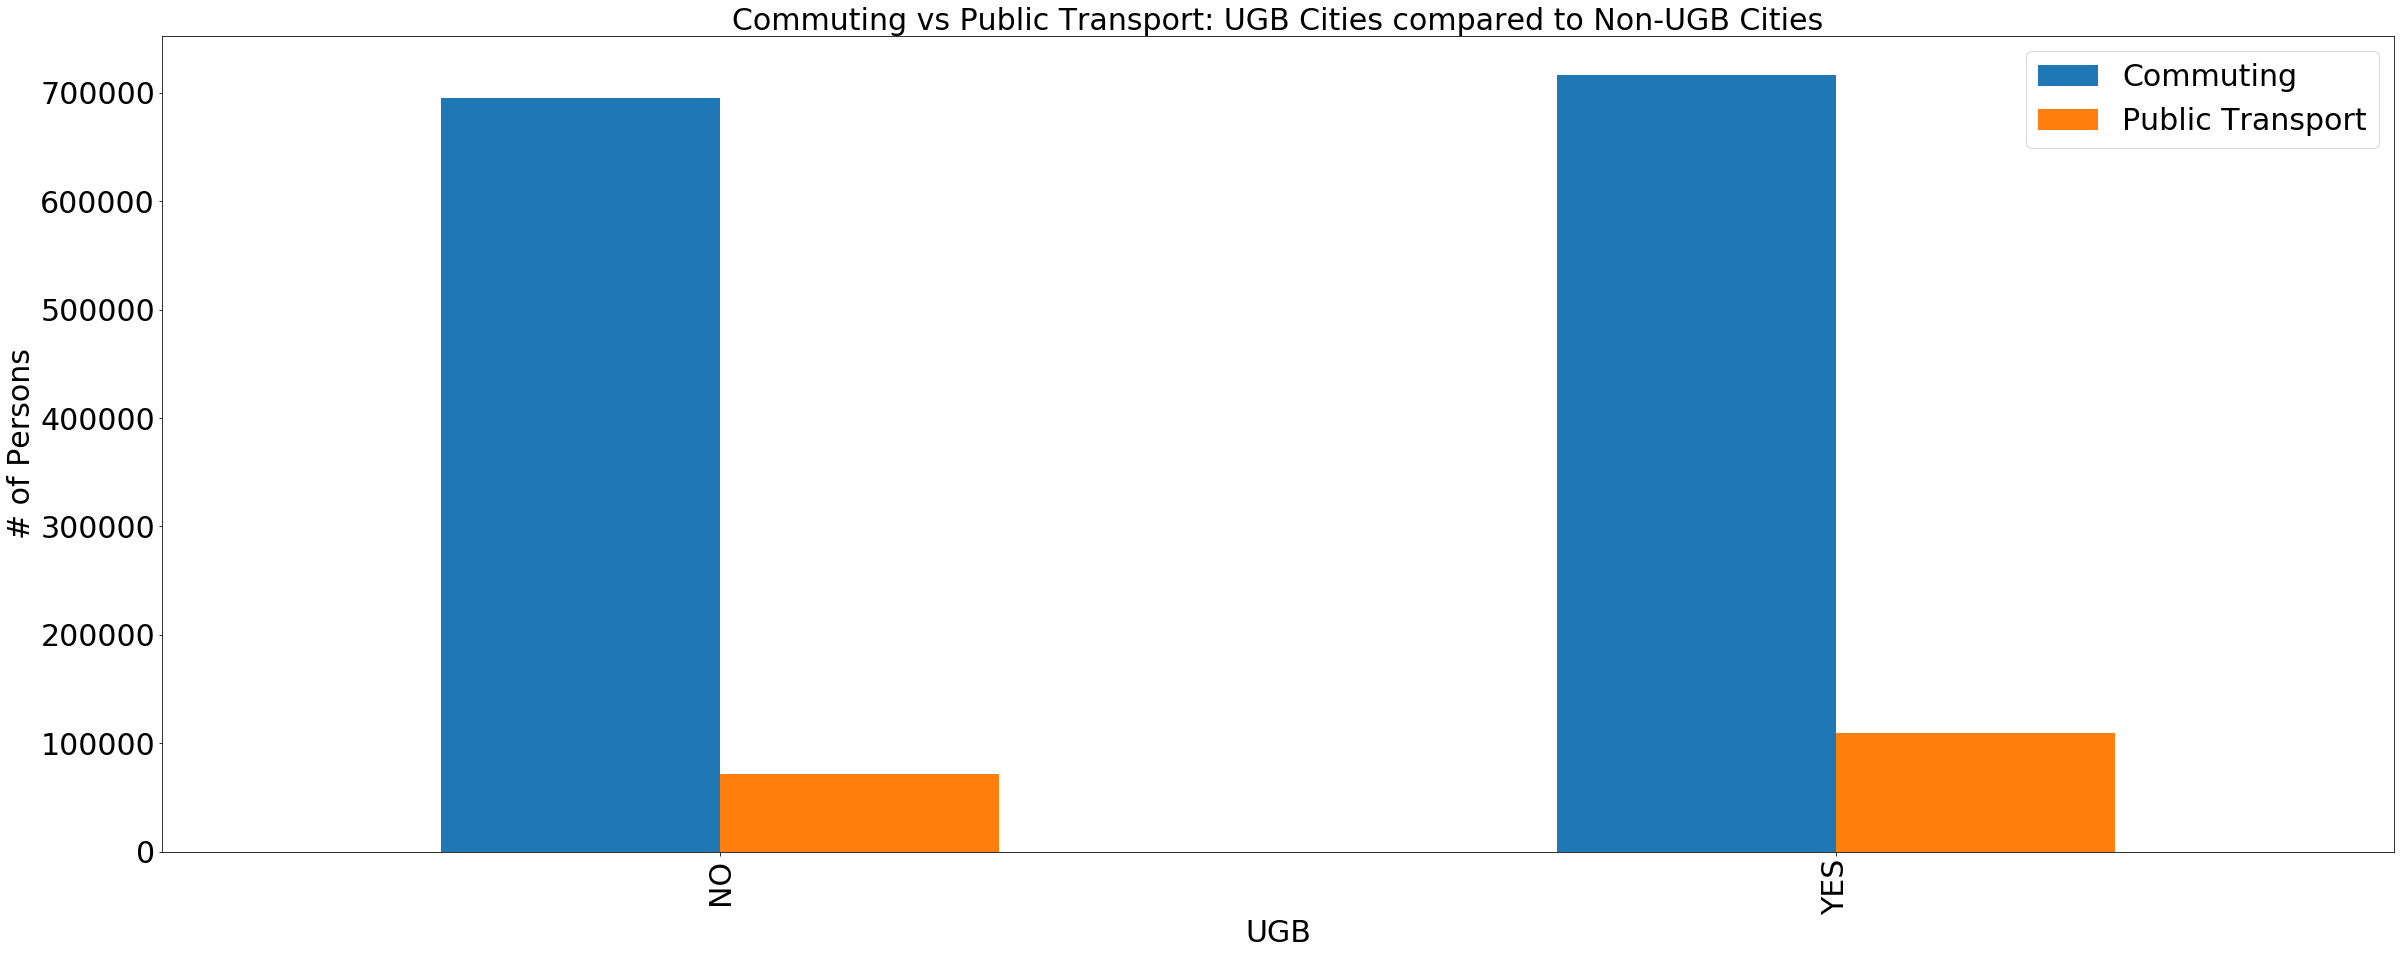

In [421]:
plt.figure()
ugb_vs_non.plot(y=["Commuting", "Public Transport"], kind="bar", figsize=(40,15), fontsize=30)
plt.title("Commuting vs Public Transport: UGB Cities compared to Non-UGB Cities", fontsize=30)
plt.xlabel("UGB", fontsize=30)
plt.ylabel("# of Persons", fontsize=30)
plt.legend(fontsize=30)
plt.show()
